**UNIVERSIDADE DE SÃO PAULO**<br>
**MBA DATA SCIENCE & ANALYTICS USP/ESALQ**<br>
**SÉRIES TEMPORAIS**<br>
**Prof. Fabiano Guasti Lima**<br>
Aluna: Luiza Batista Laquini<br>
Turma: DSA 241<br>

*coding: utf-8*

In [2]:
# Importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

### base petr4

In [6]:
# In[1]: Leitura da base

# Lendo a base de dados
basepetr4 = pd.read_excel("data/basepetr4.xlsx")

# Exibindo apenas as primeiras linhas das variaveis
basepetr4.head()

,Date,abertura,maxima,minimo,fechamento,volume
0,2020-01-02 16:56:00,30.51,30.70,30.31,30.70,37774500
1,2020-01-03 00:00:00,30.88,31.24,30.45,30.45,71595600
2,2020-01-07 16:56:00,30.82,30.88,30.47,30.69,32822000
3,2020-01-08 16:56:00,30.69,30.77,30.24,30.50,48215600
4,2020-01-09 16:56:00,30.47,30.62,30.25,30.40,36102700


In [7]:
# Buscando a cotacoes de fechamento apenas da PETR4 e chamando os dados em petr4
petr4 = basepetr4['fechamento']

petr4.head()

0    30.70
1    30.45
2    30.69
3    30.50
4    30.40
Name: fechamento, dtype: float64

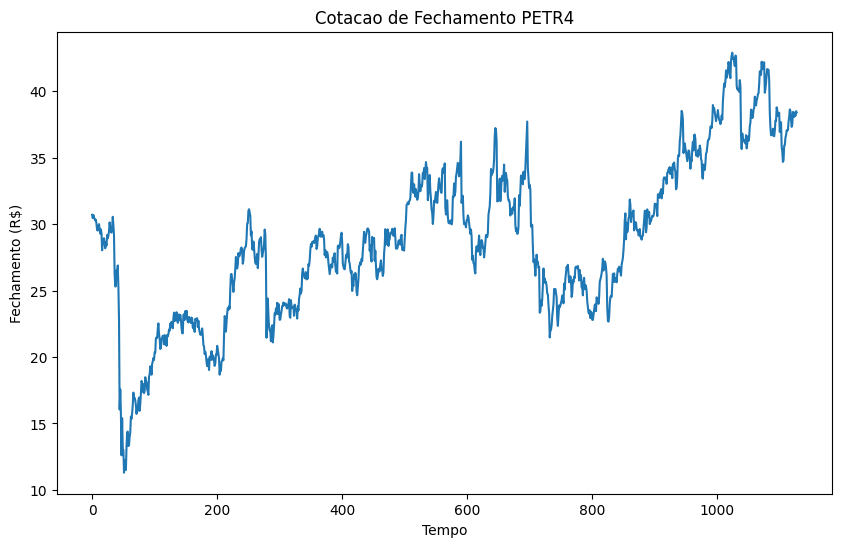

In [8]:
# In[2]: Plotando o grafico bruto (selecione todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(petr4)
plt.title('Cotacao de Fechamento PETR4')
plt.xlabel('Tempo')
plt.ylabel('Fechamento (R$)')
plt.show()

In [ ]:


# In[3]: Definindo petr4 como uma serie temporal
petr4_ts = pd.Series(petr4.values, index=pd.to_datetime(basepetr4['Date']))

# Quantas cotacoes tenho?
print(len(petr4_ts))

# In[4]: Grafico como serie de tempo usando Plotly (Selecione todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(petr4)
plt.title('Cotacao de Fechamento PETR4 - Serie Temporal')
plt.xlabel('Tempo (02/01/20 a 16/07/24)')
plt.ylabel('Fechamento (R$/acao)')
plt.show()

# In[5]: Considerando as demais informacoes da base de dados basepetr4
volume = basepetr4['volume']
minimo = basepetr4['minimo']
abertura = basepetr4['abertura']

# In[6]: Colocando os dados em forma de uma matriz com todos os dados no conjunto
# chamado dados1
dados1 = pd.concat([petr4, volume, minimo, abertura], axis=1)
dados1.columns = ['Fechamento R$', 'Volume Financ. Neg', 'Mi­nimo R$', 
                  'Abertura R$']

# In[7]: Plotando os graficos (selecione todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(dados1['Volume Financ. Neg'])
plt.title('Volume Negociado da PETR4 - jan/2020 a jul/2024')
plt.xlabel('Tempo (02/01/20 a 16/07/24)')
plt.ylabel('Volume')
plt.show()

# In[8]: Construindo uma janela com 4 graficos - Selecione todos os comandos
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].plot(dados1['Fechamento R$'])
axs[0, 0].set_title('Cotacao de Fechamento PETR4 - jan/20 a jul/24')
axs[0, 0].set_xlabel('Tempo (02/01/20 a 16/07/24)')
axs[0, 0].set_ylabel('R$')

axs[0, 1].plot(dados1['Mi­nimo R$'])
axs[0, 1].set_title('Cotacao Mi­nima no dia - PETR4 - jan/20 a jul/24')
axs[0, 1].set_xlabel('Tempo (02/01/20 a 16/07/24)')
axs[0, 1].set_ylabel('R$')

axs[1, 0].plot(dados1['Volume Financ. Neg'])
axs[1, 0].set_title('Volume Financeiro Negociado PETR4 - jan/20 a jul/24')
axs[1, 0].set_xlabel('Tempo (02/01/20 a 16/07/24)')
axs[1, 0].set_ylabel('Volume')

axs[1, 1].plot(dados1['Abertura R$'])
axs[1, 1].set_title('Cotacao de Abertura PETR4 - jan/20 a jul/24')
axs[1, 1].set_xlabel('Tempo (02/01/20 a 16/07/24)')
axs[1, 1].set_ylabel('R$')

plt.tight_layout()
plt.show()

# In[9]: Mostrar google planilhas

############## Como forma alternativa, pode-se baixar esses dados diretamente
# do yfinance
##############

# Especifica o ticker do ativo desejado (neste caso, PETR4)
ticker = "PETR4.SA"

# Define o intervalo de datas desejado
start_date = "2022-01-01"
end_date = "2024-07-16"

# Obtemos os dados do Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

# Exibe os primeiros registros dos dados obtidos
print(data.head())

# Salva os dados em um arquivo CSV
csv_file_path = "dados_petroleo.csv"
data.to_csv(csv_file_path)

# In[10]: Funcao para baixar dados do Yahoo Finance (Selecionar todos os comandos)
def obter_dados(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# In[11]: Funcao para plotar os 4 graficos (Selecionar todos os comandos)
def plotar_graficos(data):
    fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

    # Grafico 1: Abertura
    axs[0].plot(data['Open'], label='Abertura', color='blue')
    axs[0].set_ylabel('Abertura')

    # Grafico 2: Mi­nima
    axs[1].plot(data['Low'], label='Mi­nima', color='green')
    axs[1].set_ylabel('Minima')

    # Grafico 3: Maxima
    axs[2].plot(data['High'], label='Maxima', color='red')
    axs[2].set_ylabel('Maxima')

    # Grafico 4: Fechamento
    axs[3].plot(data['Close'], label='Fechamento', color='purple')
    axs[3].set_ylabel('Fechamento')

    axs[3].set_xlabel('Data')

    # Adiciona legenda
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    axs[3].legend()

    plt.tight_layout()
    plt.show()

# In[12]: Define o ticker, data de inicio e data de fim
ticker = "PETR4.SA"
start_date = "2022-01-01"
end_date = "2024-07-20"

# In[13]: Obtem os dados do Yahoo Finance
dados = obter_dados(ticker, start_date, end_date)

# In[14]: Plota os 4 graficos
plotar_graficos(dados)


# In[15]:
###############################################################################
### Trabalhando com a base de dados de Passageiros no Transporte Aereo - BR
###############################################################################

# Importando a base de dados
passageiros = pd.read_excel("passageiros.xlsx")

# Lendo a base de dados
print(passageiros.head())

# A base de dados tem duas colunas, e os passageiros transportados estao na 
# coluna 2
passag = passageiros.iloc[:, 1]

# Lendo apenas as primeiras linhas das variaveis
print(passag.head())

# Definindo o conjunto de dados passageiros como uma serie temporal
passag_ts = pd.Series(passag.values,
                      index=pd.to_datetime(passageiros.iloc[:, 0]))

# In[16]: Fazendo o grafico (Selecionar todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(passag_ts)
plt.title("Total de Passageiros no Transporte Aereo BR")
plt.xlabel("Jan/2011 a Mai/2024")
plt.ylabel("Total de Passageiros Mensal")
plt.show()


# In[17]:
###############################################################################
### Trabalhando com uma Serie Temporal da Receita Trimestral da AMBEV
###############################################################################

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Importando a base de dados
ambev = pd.read_excel("ambev.xlsx")

# Lendo a base de dados
print(ambev.head())

# Ajustando a base de dados trimestrais acumulados da Receita Liquida 
# Operacional da AMBEV
# Definindo a serie temporal com frequencia trimestral
# ATENCAO: dependendo da versao do pandas usar freq='QE'

receita = pd.Series(ambev.iloc[:, 1].values, 
                    index=pd.date_range(start='2000-01-01', periods=len(ambev), 
                                        freq='Q'))

# In[18]: Plotando o grafico
plt.figure(figsize=(10, 6))
plt.plot(receita)
plt.title("Faturamento Trimestral - Acumulado da AMBEV SA - 1T/2000 ao 1T/2024")
plt.xlabel("Trimestres - jan/2000 a dez/2022")
plt.ylabel("R$ mil")
plt.grid(True)
plt.show()


# In[19]:
###############################################################################
### Trabalhando com a base de dados das Manchas Solares
###############################################################################

# Importando a base de dados
manchas = pd.read_excel("manchas.xlsx")

# Transformar o data frame em serie de tempo (Selecionar todos os comandos)
sol = pd.Series(manchas['manchas'].values, 
                index=pd.date_range(start='1749-01-01',
                                    periods=len(manchas), freq='M'))

# In[20]: Plotando o grafico (Selecionar todos os comandos)
plt.figure(figsize=(12, 6))
plt.plot(sol)
plt.title("Numero Medio Mensal de Manchas Solares")
plt.xlabel("Mensal - jan/1749 a jun/2024")
plt.ylabel("Numero de Manchas Solares")
plt.grid(True)
plt.show()

# In[21]: Medidas das Estatisticas Descritivas da Serie Temporal
print("Resumo estatistico:")
print(sol.describe())
print("\nDesvio padrao:")
print(sol.std())
print("\nNumero de observacoes:")
print(len(sol))

# In[22]: Definir uma janela de tempo da Serie Temporal
sol1 = sol['1749-01-01':'1990-12-31']

# In[23]: Plotando o grafico da janela de tempo (Selecionar todos os comandos)
plt.figure(figsize=(12, 6))
plt.plot(sol1)
plt.title("Numero Medio Mensal de Manchas Solares (1749-1990)")
plt.xlabel("Mensal - jan/1749 a dez/1990")
plt.ylabel("Numero de Manchas Solares")
plt.grid(True)
plt.show()


# In[24]:
###############################################################################
### Trabalhando com a base de dados de Focos de Queimadas - INPE
### Fonte: https://terrabrasilis.dpi.inpe.br/queimadas/portal/
###############################################################################

# Importando a base de dados
queimadas = pd.read_excel("queimadas.xlsx")

# Transformar o data frame em serie de tempo (Selecionar todos os comandos)
queimad = pd.Series(queimadas['focos'].values, 
                index=pd.date_range(start='1999-01-01', 
                                    periods=len(queimadas), freq='M'))

# In[25]: Plotando o grafico (Selecionar todos os comandos)
plt.figure(figsize=(12, 6))
plt.plot(queimad)
plt.title("Numero de Focos de Queimadas - Programa Queimadas - INPE")
plt.xlabel("Mensal - jan/1999 a Set/2024")
plt.ylabel("Numero de Queimadas")
plt.grid(True)
plt.show()

# In[25.1] Grafico das queimadas por mes

sm.graphics.tsa.month_plot(queimad)

plt.show()

# In[26]:
###############################################################################
### Trabalhando com uma Serie Temporal de Numeros Aleatorios
###############################################################################

# Gerando numeros aleatorios com distribuicao normal padrao
aleat = pd.Series(np.random.normal(size=500))

# Visualizando os dados
print(aleat.head())

# In[27]: Plotando a serie temporal de numeros aleatorios com distribuicao normal 
# padrao (Selecionar todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(aleat)
plt.title("Serie Temporal de Numeros Aleatorios com Distribuicao Normal Padrao")
plt.xlabel("Quantidade de numeros aleatorios")
plt.ylabel("Valor")
plt.grid(True)
plt.show()

# In[28]: Calculando a media e o desvio padrao
print("Media:", aleat.mean())
print("Desvio padrao:", aleat.std())

# In[29]: Gerando uma serie de numeros aleatorios com media 2 e desvio padrao 0.1
aleat1 = pd.Series(np.random.normal(loc=2, scale=0.1, size=500))

# In[30]: Plotando a serie temporal de numeros aleatorios com media 2 e 
# desvio padrao 0.1 (Selecionar todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(aleat1)
plt.title("Serie Temporal de Numeros Aleatorios com Media 2 e Desvio Padrao 0.1")
plt.xlabel("Quantidade de numeros aleatorios")
plt.ylabel("Valor")
plt.grid(True)
plt.show()

# In[31]: Calculando a media e o desvio padrao
print("Media:", aleat1.mean())
print("Desvio padrao:", aleat1.std())


# In[32]:
###############################################################################
### Trabalhando com uma Serie Temporal de um Passeio Aleatorio
###############################################################################

# Gerando numeros aleatorios com distribuicao normal padrao
aleat = pd.Series(np.random.normal(size=500))

# Calculando o passeio aleatorio (soma cumulativa)
passeio = aleat.cumsum()

# In[33]: Plotando o passeio aleatorio (Selecionar todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(passeio)
plt.title("Passeio Aleatorio")
plt.xlabel("Num. Observacoes")
plt.ylabel("Valor")
plt.grid(True)
plt.show()


# In[34]:
###############################################################################
### Comparando a Serie PETR4(jan/2020 a jul/2024) com o Passeio Aleatorio
###############################################################################

# Supondo que voce ja tenha os dados da serie temporal `petr4` em um DataFrame
#  ou Serie do pandas
# Vou criar um exemplo simples aqui para a serie petr4

petr4 = basepetr4['fechamento']
print(petr4)

# In[35]: Criando a serie petropasseio com o mesmo tamanho da petr4, inicialmente 
# todos os valores com zero
petropasseio = pd.Series(0, index=np.arange(1128))
print(petropasseio)

# Series comecam no mesmo ponto
petropasseio.iloc[0] = petr4.iloc[0]
print(petropasseio)

# Gerando um passeio aleatorio
for i in range(1, 1128):
    petropasseio.iloc[i] = petropasseio[i - 1] + np.random.normal()

print(petropasseio)

# In[36]: Plotando no mesmo grafico as duas series
plt.figure(figsize=(12, 6))
plt.plot(petr4, label='Cotacao Original', color='blue')
plt.plot(petropasseio, label='Random Walk', linestyle='dashed', color='red')
plt.title("Cotacao Original de Fechamento e Random Walk")
plt.xlabel("Tempo em dias - jan/20 a abr/23")
plt.ylabel("R$")
plt.ylim(min(petropasseio.min(), petr4.min()), max(petropasseio.max(), petr4.max()))
plt.legend(loc='best')
plt.grid(True)
plt.show()


# In[37]:
###############################################################################
#####  DECOMPOSICAO DE SERIES TEMPORAIS
###############################################################################

##### Tendencia por medias moveis

# Analisando a serie de casos diarios de COVID 19 Brasil

# lendo a base de dados: Fonte: https://covid.saude.gov.br/
covid = pd.read_excel("covid.xlsx")

# In[38]: Transformando a coluna 'Data' em datetime
covid['Data'] = pd.to_datetime(covid['Data'])

# Media movel (14 dias)
covid['media_movel'] = covid['por_dia'].rolling(window=14).mean()

# In[39]: Visualizando a serie com as medias moveis (Selecionar todos os comandos)
plt.figure(figsize=(12, 6))
plt.plot(covid['Data'], covid['por_dia'], label='Por Dia')
plt.plot(covid['Data'], covid['media_movel'], label='Media Movel (14 dias)', 
         color='orange')
plt.title('Covid-19 - Por Dia e Media Movel')
plt.xlabel('Data')
plt.ylabel('Comportamento da Covid-19')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# In[40]: Box-Plot para verificar se temos outliers (Selecionar todos os comandos)
plt.figure(figsize=(12, 6))
sns.boxplot(x=covid['Data'].dt.to_period('M'), y=covid['por_dia'])
plt.title('Box-Plot - Comportamento da Covid-19')
plt.xlabel('Data')
plt.ylabel('Comportamento da Covid-19')
plt.xticks(rotation=90)
plt.show()

# In[41]: Limpeza dos dados com media movel
covid['covid_suave'] = covid['por_dia'].rolling(window=14, center=True).mean()
covid['media_movel_nao_centralizada'] = covid['por_dia'].rolling(window=14).mean()

# In[42]: Grafico de serie original, serie suavizada e media movel (Selecionar todos 
# os comandos)
plt.figure(figsize=(12, 6))
plt.plot(covid['Data'], covid['por_dia'], label='Serie Original', 
         color='blue')
plt.plot(covid['Data'], covid['covid_suave'], label='Serie Suavizada', 
         color='green')
plt.plot(covid['Data'], covid['media_movel'], label='Media Movel', 
         color='orange')
plt.title('Covid-19 - Series Original, Suavizada e Media Movel')
plt.xlabel('Data')
plt.ylabel('Comportamento da Covid-19')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


# In[43]:
############
# Decomposicao da serie temporal em suas componentes(Tendencia, Sazonal e 
# Residuos)
# Precisamos da biblioteca statsmodels para realizar a decomposicao da serie 
# temporal nos modelos aditivo e multiplicativo alem de plotar seus componentes 
#################################

from statsmodels.tsa.seasonal import seasonal_decompose


# Criar a serie temporal
data = pd.date_range(start='2019-01-01', end='2022-12-31', freq='Q')
values = [10, 14, 8, 25, 16, 22, 14, 35, 15, 27, 18, 40, 28, 40, 25, 65]
s = pd.Series(values[:len(data)], index=data)

# In[44]: Plotar a serie temporal (Selecionar todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(s)
plt.title('Serie Temporal')
plt.show()

# In[45]: Decomposicao pelo modelo ADITIVO
decompa = seasonal_decompose(s, model='additive', period=4)

# observando os valores da decomposicao pelo modelo aditivo
print(decompa.trend)
print(decompa.seasonal)
print(decompa.resid)

# In[46]: Plotar a decomposicao (Selecionar todos os comandos)
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(decompa.trend)
plt.title('Tendencia')

plt.subplot(4, 1, 2)
plt.plot(decompa.seasonal)
plt.title('Componente Sazonal')

plt.subplot(4, 1, 3)
plt.plot(decompa.resid)
plt.title('Resi­duos')

plt.subplot(4, 1, 4)
plt.plot(s, label='Original')
plt.plot(decompa.trend + decompa.seasonal + decompa.resid, label='Reconstrui­da')
plt.title('Original vs. Reconstrui­da')
plt.legend()

plt.tight_layout()
plt.show()

# In[47]: Decomposicao pelo modelo MULTIPLICATIVO
decompm = seasonal_decompose(s, model='multiplicative', period=4)

# observando os valores da decomposicao pelo modelo multiplicativo
print(decompm.trend)
print(decompm.seasonal)
print(decompm.resid)

# In[48]: Plotar a decomposicao (Selecionar todos os comandos)
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(decompm.trend)
plt.title('Tendencia')

plt.subplot(4, 1, 2)
plt.plot(decompm.seasonal)
plt.title('Componente Sazonal')

plt.subplot(4, 1, 3)
plt.plot(decompm.resid)
plt.title('Resi­duos')

plt.subplot(4, 1, 4)
plt.plot(s, label='Original')
plt.plot(decompm.trend * decompm.seasonal * decompm.resid, label='Reconstrui­da')
plt.title('Original vs. Reconstruida')
plt.legend()

plt.tight_layout()
plt.show()


# In[49]:
###############################################################################
## Trabalhando com a serie do PIB do Brasil 
######################################################

pib = pd.read_excel("pib_mensal.xlsx", parse_dates=True, index_col=0)
 
# Transformar a base de dados em um objeto de classe ts
pib_ts = pd.Series(pib['pib'].values, index=pib.index)
 
# In[50]: Plotar a serie temporal (Selecionar todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(pib_ts.index, pib_ts.values, label='PIB', color='blue')
plt.title('Produto Interno Bruto - PIB')
plt.xlabel('Jan/2004 a Mai/2024')
plt.ylabel('R$ Milhares')
plt.legend()
plt.show()

# In[51]: Decompondo o PIB pelo modelo aditivo
decomp_aditivo = seasonal_decompose(pib_ts, model='additive', period=12)

# In[52]: Plotando a decomposicao (Selecionar todos os comandos)
decomp_aditivo.plot()
plt.suptitle('Decomposicao Aditiva do PIB')
plt.show()

# In[53]: Decompondo o PIB pelo modelo multiplicativo
decomp_multiplicativo = seasonal_decompose(pib_ts, model='multiplicative', 
                                           period=12)

# In[54]: Plotando a decomposicao (Selecionar todos os comandos)
decomp_multiplicativo.plot()
plt.suptitle('Decomposicao Multiplicativa do PIB')
plt.show()

# In[55]:
###############################################################################
##### Aplicando a decomposicao das series temporais
##### usando a palheta de cores viridis
############# decomposicao da serie temporal do PIB Mensal BR

from statsmodels.tsa.seasonal import seasonal_decompose

# Configurar o estilo dos graficos e a paleta de cores
sns.set(style='whitegrid', palette='viridis')

# Carregar os dados do Excel
pib = pd.read_excel('pib_mensal.xlsx')

# Transformar a base de dados em um objeto de serie temporal (Selecione todos
# os comandos)
pib_ts = pd.Series(pib.iloc[:, 1].values, 
                   index=pd.date_range(start='2004-01-01',
                                       periods=len(pib), freq='M'))

# In[56]: Fazer a plotagem da serie temporal (Selecione todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(pib_ts, color=sns.color_palette("viridis", 2)[0])
plt.title('Produto Interno Bruto - PIB')
plt.xlabel('Jan/2004 a Mai/2024')
plt.ylabel('R$ milhares')
plt.show()

# In[57]: Decompor o PIB pelo modelo aditivo
decomp_add = seasonal_decompose(pib_ts, model='additive', period=12)

# Decompor o PIB pelo modelo multiplicativo
decomp_mul = seasonal_decompose(pib_ts, model='multiplicative', period=12)

# In[58]: Funcao para plotar decomposicao (Selecionar todos os comandos)
def plot_decomposition(decomposition, title):
    colors = sns.color_palette("viridis", 4)
    
    plt.figure(figsize=(14, 10))
    plt.suptitle(title, fontsize=16)

    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observado', color=colors[0])
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Tendencia', color=colors[1])
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Sazonalidade', color=colors[2])
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.subplot(414)
    plt.plot(decomposition.resid, label='ResÃiduos', color=colors[3])
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# In[59]: Plotar decomposicao aditiva
plot_decomposition(decomp_add, 'Decomposicao Aditiva do PIB Mensal BR')

# Plotar decomposicao multiplicativa
plot_decomposition(decomp_mul, 'Decomposicao Multiplicativa do PIB Mensal BR')


# In[60]:
###############################################################################
### Estatisticas de Acuracia das previsoes
###############################################################################

# from sklearn.metrics import accuracy_score

# Exemplo
reais = np.array([1, 2, 3, 5, 6, 8, 9])
previstos = np.array([1, 3, 3, 4, 6, 7, 9])

# Calculo do Erro
erro = reais - previstos

# Calculo do Erro Medio
merror = sum(erro)/len(erro)
merror

# Calculo do Erro Absoluto Medio
mae = mean_absolute_error(reais, previstos)
mae

# Calculo da Raiz Quadrada do Erro Medio
rmse = mean_squared_error(reais, previstos, squared=False)
rmse

# Calculo do Erro Percentual Medio
erro_percentual = (reais - previstos)/reais
mpe = me = sum(erro_percentual)/len(erro)*100
mpe

# Calculo do Erro Absoluto Percentual Medio
mape = mean_absolute_percentage_error(reais,previstos)*100
mape

# In[61]: Calculo do Coeficiente U de Theil
# Funcao para calculo do Coeficiente U de Theil (selecionar todos os comandos)

def division(measure, previousI):
  return measure / previousI

def power(measure):
  return np.power(measure, 2)

def summation(measure):
  return np.sum(measure)

def mean(N, measure):
  return (1/N) * measure

def sqrt(measure):
  return np.sqrt(measure)

def computeTheilU2(y_true, y_pred):
    N = len(y_true)
    
    subtractionNumerator = y_pred[1:] - y_true[1:]
    divisionNumerator = division(subtractionNumerator, y_true[:-1])
    powerNumerator = power(divisionNumerator)
    summationNumerator = summation(powerNumerator)
    meanNumerator = mean(N, summationNumerator)
    numerator = sqrt(meanNumerator)
    
    subtractionDenominator = y_true[1:] - y_true[:-1]
    powerDenominator = power(division(subtractionDenominator, y_true[:-1]))
    denominator = sqrt(mean(N, summation(powerDenominator)))
        
    theilU2 = numerator / denominator
    
    return theilU2

theil = computeTheilU2(reais,previstos)

theil

# In[62]: Exibir as metricas de acuracia (Selecione todos os comandos)
print(" Indicadores de Acuracia")
print(f'ME - Mean Error: {merror:.2f}')
print(f'MAE - Mean Absolute Error: {mae:.2f}')
print(f'RMSE - Raiz Quadrada do Erro Medio: {rmse:.2f}')
print(f'MPE - Mean Percentage Error: {mpe:.2f}')
print(f'MAPE - Mean Absolute Percentage Error: {mape:.2f}')
print(f'THEIL_U - Theils Inequality Coefficient: {theil:.4f}')


# In[63]:
###############################################################################
###############################################################################
### Metodos SIMPLES de Previsao de Series Temporais
###############################################################################
###############################################################################

# Serie - Exemplo
 
serie = np.array([3, 5, 9, 20, 12, 17, 22, 23, 51, 41, 56, 75, 60, 75, 88])


# In[64]:
###############################################################################
### Metodo NAIVE 
###############################################################################

from scipy import stats

# Funcao para realizar previsao naive e calcular intervalos de confianca 
# ajustados

def naive_forecast(time_series, h=3, confidence_level=0.95):
    # A ultima observacao da serie
    last_observation = time_series[-1]
    
    # Previsoes naive para h passos a  frente
    forecasts = np.array([last_observation] * h)
    
    # Calculando os erros de previsao
    errors = time_series[1:] - time_series[:-1] 
    erro2=errors*errors
    std_error =np.sqrt(erro2.mean())  # Desvio dos erros
    
    # Valor cri­tico da distribuicao normal para o ni­vel de confianca desejado
    z_value = stats.norm.ppf((1 + confidence_level) / 2)
    
    # Calculando os intervalos de confianca com ajuste para h passos a  frente
    confidence_intervals = [
        (forecast - z_value * std_error * np.sqrt(step+1), 
         forecast + z_value * std_error * np.sqrt(step+1))
        for step, forecast in enumerate(forecasts)
    ]
    
    # Criando um DataFrame para armazenar previsoes e intervalos de confianca
    forecast_df = pd.DataFrame({
        "Previsao": forecasts,
        "IC Inferior": [ci[0] for ci in confidence_intervals],
        "IC Superior": [ci[1] for ci in confidence_intervals]
    }, index=[f'T+{i+1}' for i in range(h)])
    
    return forecast_df, confidence_intervals

# In[65]: Funcao para plotar a serie temporal com previsoes e intervalos de confianca 
def plot_naive_forecast(time_series, forecast_df):
    n = len(time_series)
    h = len(forecast_df)
    
    plt.figure(figsize=(10, 6))
    
    # Plotando os valores reais da serie temporal
    plt.plot(range(n), time_series, label='Serie Temporal', color='blue')
    
    # Plotando os valores previstos
    plt.plot(range(n-1, n+h), np.concatenate(([time_series[-1]], 
                                              forecast_df['Previsao'])), 
             label='Previsao (Naive)', linestyle='--', marker='o', color='orange')

    # Plotando os limites inferior e superior dos intervalos de confianca
    plt.plot(range(n, n+h), forecast_df['IC Inferior'], 
             label='IC Inferior (95%)', linestyle='--', color='red')
    plt.plot(range(n, n+h), forecast_df['IC Superior'],
             label='IC Superior (95%)', linestyle='--', color='green')

    # Adicionando ro­tulos e legendas
    plt.title('Previsao Naive com Intervalos de Confianca (95%)')
    plt.xlabel('Tempo')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    
    # Exibindo o grafico
    plt.show()

# In[66]: Aplicando a previsao naive com intervalos de confianca ajustados
naiveforecast_df, confidence_intervals = naive_forecast(serie, h=3)

# Mostrando o DataFrame com previsoes
print(naiveforecast_df)

# Plotando os resultados com previsoes e intervalos de confianca como linhas
plot_naive_forecast(serie, naiveforecast_df)


# In[67]:
###############################################################################
### Metodo de previsao pela MEDIA 
###############################################################################

# Funcao para realizar previsao pela media e calcular intervalos de confianca 

def forecast_with_mean(time_series, steps_ahead, confidence=0.95):
    # Calcular a media da serie
    mean_series = np.mean(time_series)
    
    # Calcular os erros (resi­duos) da previsao pela media
    errors = time_series - mean_series
    
    # Calcular o desvio padrao dos erros
    std_errors = np.std(errors, ddof=1)
    
    # Prever com base na media
    forecast = [mean_series] * steps_ahead

    # Calcular intervalo de confianca usando o desvio padrao dos erros
    n = len(time_series)
    alpha = 1 - confidence
    t_value = stats.t.ppf(1 - alpha/2, df=n-1)  
    margin_of_error = t_value * std_errors*np.sqrt(1+1/len(time_series))
    
    # Inferior e superior
    lower_bound = [mean_series - margin_of_error] * steps_ahead
    upper_bound = [mean_series + margin_of_error] * steps_ahead

    return forecast, lower_bound, upper_bound

# In[68]: Funcao para plotar a serie original e a previsao
def plot_forecast_with_mean(time_series, forecast, lower_bound,
                                            upper_bound, steps_ahead):
    # Plotar a serie original
    plt.plot(range(len(time_series)), time_series, label="Serie Original", 
             marker='o')
    
    # Criar eixo de tempo para previsao
    forecast_range = range(len(time_series), len(time_series) + steps_ahead)
    
    # Plotar a previsao
    plt.plot(forecast_range, forecast, label="Previsao", marker='o', 
             linestyle='--')
    
    # Plotar intervalo de confianca
    plt.fill_between(forecast_range, lower_bound, upper_bound, color='gray',
                     alpha=0.05, label='Intervalo de Confianca')
    
    # Detalhes do grafico
    plt.xlabel("Tempo")
    plt.ylabel("Valores")
    plt.legend()
    plt.title("Serie Original e Previsao com Intervalo de Confianca pela media")
    plt.show()

# In[69]: Definir numero de passos a  frente
h = 3

# Gerar previsao e intervalos de confianca
forecast_mean, lower_bound, upper_bound = forecast_with_mean(serie, h)

forecast_mean

# In[70]: Exibir resultados
print("Previsao", forecast_mean)
print("Limite inferior do intervalo de confianca:", lower_bound)
print("Limite superior do intervalo de confianca:", upper_bound)

# In[71]: Chamar a funcao de plotagem
plot_forecast_with_mean(serie, forecast_mean, lower_bound, upper_bound, h)


# In[72]:
###############################################################################

###############################################################################
### Metodo de previsao com DRIFT
###############################################################################

# Funcao para calcular a previsao pelo modelo de Drift
def drift_forecast(time_series, steps_ahead, confidence=0.95):
    n = len(time_series)
    
    # Previsao pelo modelo de drift
    drift = (time_series[-1] - time_series[0]) / (n - 1)
    forecast = [time_series[-1] + (i + 1) * drift for i in range(steps_ahead)]
    
    # Calculo dos erros 
    predicted_values = []
    for i in range(1, n):
        predicted_values.append(time_series[i-1] + drift)
    
    # Calcular os erros como a diferenca entre os valores reais e os previstos
    errors = time_series[1:] - np.array(predicted_values)
    erro2=errors*errors
   
    # Calcular o desvio dos erros
    std_errors = np.sqrt(erro2.mean())
 
    # variavel auxiliar para o intervalo de confianca
    calc = len(errors)
  
    # Calcular intervalo de confianca usando o desvio padrao dos erros
    z_value = stats.norm.ppf((1 + confidence) / 2)
   
    # Limites inferior e superior
    lower_bound = [forecast[i] -
                   z_value * std_errors * np.sqrt((i+1)*(1+(i+1)/(calc -1)))
                   for i in range(steps_ahead)]
    upper_bound = [forecast[i] +
                   z_value * std_errors * np.sqrt((i+1)*(1+(i+1)/(calc -1))) 
                   for i in range(steps_ahead)]
        
    return forecast, lower_bound, upper_bound

# In[73]: Funcao para plotar a serie original e a previsao pelo modelo de Drift
def plot_forecast_with_drift(time_series, forecast, lower_bound,
                                            upper_bound, steps_ahead):
    # Plotar a serie original
    plt.plot(range(len(time_series)), time_series, label="Serie Original",
             marker='o')
    
    # Criar eixo de tempo para previsao
    forecast_range = range(len(time_series), len(time_series) + steps_ahead)
    
    # Plotar a previsao
    plt.plot(forecast_range, forecast, label="Previsao (Drift)", marker='o', 
             linestyle='--')
    
    # Plotar intervalo de confianca
    plt.fill_between(forecast_range, lower_bound, upper_bound, color='gray', 
                     alpha=0.05, label='Intervalo de Confianca')
    
    # Detalhes do grafico
    plt.xlabel("Tempo")
    plt.ylabel("Valores")
    plt.legend()
    plt.title("Serie Original e Previsao pelo Modelo de Drift com Intervalo de Confianca")
    plt.show()

# In[74]: Definir numero de passos a  frente
h = 5

# Gerar previsao e intervalos de confianca pelo modelo de Drift
forecast_drift, lower_bound, upper_bound = drift_forecast(serie, h)

forecast_drift
lower_bound
upper_bound

# Chamar a funcao de plotagem
plot_forecast_with_drift(serie, forecast_drift, lower_bound, upper_bound, h)


# In[75]:
###############################################################################
### Metodo de previsao com NAIVE SAZONAL
###############################################################################

# Funcao para rodar o modelo Naive Sazonal com intervalos de confianca
def seasonal_naive_forecast(time_series, season_length, steps_ahead, confidence=0.95):
    """
    time_series: Série temporal
    season_length: Período sazonal (ex: 12 meses para sazonalidade mensal)
    steps_ahead: O número de períodos à frente para previsão
    confidence: Nível de confiança (95% por padrão)
    """
    # Prever o valor com base na sazonalidade anterior
    forecast = [time_series.iloc[-season_length + i] for i in range(steps_ahead)]
    
    # Previsão dos valores dentro da série histórica para obter resíduos
    predicted_values = [time_series.iloc[i - season_length] for i in range(season_length, len(time_series))]
  
    # Calcular os erros residuais
    residuals = time_series.iloc[season_length:] - np.array(predicted_values)
    
    # Calcular o quadrado dos erros (resíduos)
    errors2 = residuals ** 2
    
    # Calcular o desvio padrão dos erros
    std_residuals = np.sqrt(errors2.mean())
 
    # Calcular o valor crítico z para o intervalo de confiança
    z_value = stats.norm.ppf((1 + confidence) / 2)
    
    # Calcular a margem de erro
    margin_of_error = z_value * std_residuals
    
    # Definir limites inferiores e superiores dos intervalos de confiança
    lower_bound = [forecast[i] - margin_of_error * np.sqrt((i // season_length) + 1) for i in range(steps_ahead)]
    upper_bound = [forecast[i] + margin_of_error * np.sqrt((i // season_length) + 1) for i in range(steps_ahead)]
    
    return forecast, lower_bound, upper_bound

# In[76]: Funcao para plotar a serie original, previsao e intervalos de confianca
def plot_seasonal_naive_forecast(time_series, forecast, lower_bound,
                                 upper_bound, steps_ahead):
    # Plotar a serie original
    plt.plot(range(len(time_series)), time_series, label="Serie Original",
             marker='o')
    
    # Criar eixo de tempo para previsao
    forecast_range = range(len(time_series), len(time_series) + steps_ahead)
    
    # Plotar a previsao
    plt.plot(forecast_range, forecast, label="Previsao (Naive Sazonal)", 
             marker='o', linestyle='--')
    
    # Plotar intervalo de confianca
    plt.fill_between(forecast_range, lower_bound, upper_bound, color='gray',
                     alpha=0.2, label='Intervalo de Confianca')
    
    # Detalhes do grafico
    plt.xlabel("Tempo")
    plt.ylabel("Valores")
    plt.legend()
    plt.title("Serie Original e Previsao pelo Modelo Naive Sazonal com Intervalo de Confianca")
    plt.show()

# In[77]: Importando a base de dados
# pip install --upgrade openpyxl

airp = pd.read_excel("airpassengers.xlsx")

# Lendo a base de dados
print(airp.head())

# In[78]: Definindo a serie temporal com frequencia mensal
airpas = pd.Series(airp.iloc[:, 1].values, 
                    index=pd.date_range(start='2007-01-01', periods=len(airp), 
                                        freq='M'))

# In[79]: Plotando o grafico
plt.figure(figsize=(10, 6))
plt.plot(airpas)
plt.title("Transporte Aereo de Passageiros - jan/2007 ao dez/2018")
plt.xlabel("Meses - jan/2007 a dez/2018")
plt.ylabel("Numero de pessoas")
plt.grid(True)
plt.show()

# In[80]: Definir os parametros de sazonalidade e numero de passos a  frente
season_length = 12  # Por exemplo, 12 meses para sazonalidade anual
steps_ahead = 12  # Prevendo os proximos 12 peri­odos (um ano a  frente - h)

# In[81]: Gerar previsao e intervalos de confianca pelo modelo Naive Sazonal
forecast, lower_bound, upper_bound = seasonal_naive_forecast(airpas, 
                                                season_length, steps_ahead)

forecast
lower_bound
upper_bound

# Chamar a funcao de plotagem
plot_seasonal_naive_forecast(airpas, forecast, lower_bound, upper_bound, 
                             steps_ahead)


# In[82]:
###############################################################################
### Modelos de SUAVIZACAO EXPONENCIAL - Simples
###############################################################################

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HW

# Base simples
base = pd.Series([3, 5, 9, 20, 12, 17, 22, 23, 51, 41, 56, 75, 60, 75, 88])

# Visualização da base de dados
plt.plot(base)
plt.title("Base Simples")
plt.show()


# In[83]:
###############################################################################
# Suavização Exponencial Simples (SES) - Modelagem simples sem tendência/sazonalidade
###############################################################################

# Criando o modelo SES
ses_model = SimpleExpSmoothing(base).fit()
print(ses_model.summary())

ses_forecast = ses_model.forecast(3)

# Visualização dos valores previstos
print("Previsões (SES):")
print(ses_forecast)

# Valores ajustados

print("Valores Ajustados (SES):")
print(ses_model.fittedvalues)

# In[84]: Visualização dos dados e previsões com intervalos de confiança
plt.plot(base, label="Base de Dados")
plt.plot(ses_model.fittedvalues, label="Ajustado (SES)")
plt.plot(np.arange(len(base), len(base) + 3), ses_forecast, label="Previsão (SES)")
plt.title("Suavização Exponencial Simples (SES)")
plt.legend()
plt.show()


# In[85]:
###############################################################################
# Modelo de Holt com Tendência
###############################################################################

# Modelo Holt
holt_model = Holt(base).fit()
print(holt_model.summary())

holt_forecast = holt_model.forecast(3)

# Visualizando os valores previstos
print("Previsão com Holt: ")
print(holt_forecast)

# In[86]: Visualização dos dados e previsões
plt.plot(base, label="Dados Originais")
plt.plot(holt_model.fittedvalues, label="Ajustado (Holt)")
plt.plot(np.arange(len(base), len(base) + 3), holt_forecast, label="Previsão (Holt)")
plt.title("Modelo de Holt com Tendência")
plt.legend()
plt.show()


# In[87]:
###############################################################################
# Modelo Holt-Winters com Tendência (Holt-Winters atribuindo a tendencia)
###############################################################################

ajuste2 = HW(base, trend='add', seasonal=None).fit()
print(ajuste2.summary())

fitted_ajuste2 = ajuste2.fittedvalues
print("Valores ajustados (Holt-Winters com tendência):")
print(fitted_ajuste2)

# Previsão de 5 passos à frente
prevajuste2 = ajuste2.forecast(5)
print("Previsão para os próximos 5 períodos:")
print(prevajuste2)

# In[88]: Visualização dos dados ajustados e previsão
plt.plot(base, label="Dados originais")
plt.plot(fitted_ajuste2, label="Ajustado (Holt-Winters com tendência)")
plt.plot(np.arange(len(base), len(base) + 5), prevajuste2, label="Previsão")
plt.title("Holt-Winters com Tendência")
plt.legend()
plt.show()


# In[89]:
###############################################################################
# Modelo de Holt-Winters com Tendência e Sazonalidade
###############################################################################

# Nova base de dados com sazonalidade
base2 = pd.Series([10, 14, 8, 25, 16, 22, 14, 35, 15, 27, 18, 40, 28, 40, 25, 65],
                  index=pd.date_range(start='2019-01-01', periods=16, freq='Q'))


def plot_holtwinters(model, fitted_values, forecast, model_type):
    plt.figure(figsize=(10, 6))

    # Obter datas para o período da previsão
    forecast_index = pd.date_range(start=base2.index[-1] + pd.offsets.QuarterEnd(), periods=len(forecast), freq='Q')

    # Plotando os dados originais, ajustados e previsão
    plt.plot(base2.index, base2, label="Dados Originais", marker='o', color='blue')
    plt.plot(base2.index, fitted_values, label="Valores Ajustados", marker='o', color='green')
    plt.plot(forecast_index, forecast, label="Previsão", marker='o', color='red')

    # Intervalo de confiança
    plt.fill_between(forecast_index, forecast * 0.95, forecast * 1.05, color='gray', alpha=0.2, label="Intervalo de Confiança 95%")

    plt.title(f"Modelo Holt-Winters ({model_type})", fontsize=14)
    plt.xlabel("Período", fontsize=12)
    plt.ylabel("Valores", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# In[90]: Modelo Holt-Winters Aditivo

ajuste4 = HW(base2, trend='add', seasonal='add', seasonal_periods=4).fit()
fitted_ajuste4 = ajuste4.fittedvalues
print(ajuste4.summary())

prevajuste4 = ajuste4.forecast(4)
print("Previsão para os próximos 4 períodos:")
print(prevajuste4)

# In[91]: Gráfico do modelo aditivo
plot_holtwinters(ajuste4, fitted_ajuste4, prevajuste4, model_type="Aditivo")

# In[92]: Modelo Holt-Winters Multiplicativo
ajuste5 = HW(base2, trend='add', seasonal='mul', seasonal_periods=4).fit()
fitted_ajuste5 = ajuste5.fittedvalues
print(ajuste5.summary())

prevajuste5 = ajuste5.forecast(4)
prevajuste5

# In[93]: Gráfico do modelo multiplicativo
plot_holtwinters(ajuste5, fitted_ajuste5, prevajuste5, model_type="Multiplicativo")


# In[94]:
###############################################################################
### COMPARANDO AGORA OS MODELOS DE PREVISAO
###############################################################################

# importação dos pacotes
from sklearn.metrics import mean_absolute_percentage_error as mape
#from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
#from statsmodels.tsa.stattools import acf
#from statsmodels.tsa.forecasting.stl import STLForecast
#from statsmodels.tsa.forecasting.theta import ThetaModel
import statsmodels.api as sm

# In[95]:
# Separar a base de dados em treino e teste (janela de dados) para a série da AMBEV
ambev = pd.read_excel('ambev.xlsx')
ambev
receita=pd.Series(ambev.iloc[:,2].values,
                  index=pd.date_range(start='2000-01-01', periods=len(ambev),
                                      freq='Q'))
bambev = receita[:-9]
reais = receita[-9:]

# In[96]: Lista para armazenar os MAPE
modelos = []
mapes = []

bambev

reais


# In[97]:
###############################################################################
# Modelo Naive
naive_forecast = pd.Series([bambev.iloc[-1]] * len(reais), index=reais.index)
print(naive_forecast)
mape_naive = mape(reais, naive_forecast)*100
modelos.append("Naive")
mapes.append(mape_naive)
print(mape_naive)

# In[98]:
###############################################################################
# Modelo Mean (média)
mean_forecast = pd.Series(bambev.mean(), index=reais.index)
print(mean_forecast)
mape_mean = mape(reais, mean_forecast)*100
modelos.append("Mean")
mapes.append(mape_mean)
print(mape_mean)

# In[99]:
###############################################################################
# Modelo Drift
n = len(bambev)
drift_slope = (bambev.iloc[-1] - bambev.iloc[0]) / (n - 1)
drift_forecast = bambev.iloc[-1] + drift_slope * np.arange(1, len(reais) + 1)
drift_forecast = pd.Series(drift_forecast, index=reais.index)
print(drift_forecast)
mape_drift = mape(reais, drift_forecast)*100
print(mape_drift)

# In[100]:
###############################################################################
# Modelo Naive Sazonal
naive_sazonal_forecast = pd.Series([bambev.iloc[-4 + (i % 4)]
                                    for i in range(len(reais))],
                                   index=reais.index)
print(naive_sazonal_forecast)
mape_naive_sazonal = mape(reais, naive_sazonal_forecast)*100
modelos.append("Naive Sazonal")
mapes.append(mape_naive_sazonal)
print(mape_naive_sazonal)

# In[101]:
###############################################################################
# Suavização Exponencial Simples (SES)
ses_model = SimpleExpSmoothing(bambev).fit()
ses_forecast = ses_model.forecast(steps=len(reais))
print(ses_forecast)
mape_ses = mape(reais, ses_forecast)*100
modelos.append("SES")
mapes.append(mape_ses)
print(mape_ses)

# In[102]:
###############################################################################
# Holt com Tendência
holt_model = Holt(bambev).fit()
holt_forecast = holt_model.forecast(steps=len(reais))
print(holt_forecast)
mape_holt = mape(reais, holt_forecast)*100
modelos.append("Holt")
mapes.append(mape_holt)
print(mape_holt)

# In[103]:
###############################################################################
# Holt-Winters Aditivo
hw_add_model = ExponentialSmoothing(bambev, seasonal_periods=4, trend='add', seasonal='add').fit()
hw_add_forecast = hw_add_model.forecast(steps=len(reais))
print(hw_add_forecast)
mape_hw_add = mape(reais, hw_add_forecast)*100
modelos.append("Holt-Winters Aditivo")
mapes.append(mape_hw_add)
print(mape_hw_add)

# In[104]:
###############################################################################
# Holt-Winters Multiplicativo
hw_mult_model = ExponentialSmoothing(bambev, seasonal_periods=4, trend='add', seasonal='mul').fit()
hw_mult_forecast = hw_mult_model.forecast(steps=len(reais))
print(hw_mult_forecast)
mape_hw_mult = mape(reais, hw_mult_forecast)*100
modelos.append("Holt-Winters Multiplicativo")
mapes.append(mape_hw_mult)
print(mape_hw_mult)

# In[105]:
###############################################################################
# Comparação dos modelos com base no MAPE
mape_comparison = pd.DataFrame({'Modelo': modelos, 'MAPE': mapes})
mape_comparison = mape_comparison.sort_values(by='MAPE', ascending=False).reset_index(drop=True)
print(mape_comparison)

# In[106]:
# Visualizar os MAPE dos modelos em ordem decrescente
plt.figure(figsize=(10, 6))
plt.barh(mape_comparison['Modelo'], mape_comparison['MAPE'], color='skyblue')
plt.xlabel("MAPE")
plt.title("MAPE Comparação de Modelos")
plt.grid(True)
plt.show()


# In[107]:
###############################################################################
## MODELO ETS
###############################################################################

from statsmodels.stats.diagnostic import acorr_ljungbox
 
# Importando os dados da série temporal da Ambev
ambev = pd.read_excel('ambev.xlsx')
ambev.head()

receita=pd.Series(ambev.iloc[:,2].values,
                  index=pd.date_range(start='2000-01-01', periods=len(ambev),
                                      freq='Q'))

# Separar a base de dados em treino e teste (janela de dados)
bambev = receita[:-9]
reais = receita[-9:]

# In[108]: Visualizando a série temporal de treino e teste
plt.figure(figsize=(10, 6))
plt.plot(receita.index, receita, label="Série Completa", color='gray')
plt.plot(bambev.index, bambev, label="Treino", color='blue')
plt.plot(reais.index, reais, label="Reais", color='red')
plt.title("Série Temporal - Treino e Teste")
plt.xlabel("Data")
plt.ylabel("Valores")
plt.legend()
plt.grid(True)
plt.show()

# In[109]: Definir todas as combinações possíveis de modelos para ETS
configs = [
    {'trend': None, 'seasonal': None},
    {'trend': 'add', 'seasonal': None},
    {'trend': None, 'seasonal': 'add'},
    {'trend': 'add', 'seasonal': 'add'}
]

best_aic = float('inf')
best_config = None
best_model = None

# In[110]: Ajustar os modelos com diferentes configurações e comparar AIC
for config in configs:
    try:
        model = ExponentialSmoothing(bambev, seasonal_periods=4, trend=config['trend'], seasonal=config['seasonal']).fit()
        aic = model.aic

        if aic < best_aic:
            best_aic = aic
            best_config = config
            best_model = model
    except Exception as e:
        pass  # Ignorar configurações que não funcionam

# In[111]: Exibir o melhor modelo com base no AIC
print(f"Melhor configuração: {best_config} com AIC = {best_aic}")
print(best_model.summary())

# In[112]: Previsão de 9 passos à frente com o melhor modelo
best_forecasts = best_model.forecast(steps=9)
print("Previsão para os próximos 9 períodos:")
print(best_forecasts)

# In[113]: Cálculo do MAPE entre a previsão e os valores reais
quali_ETS = mape(reais, best_forecasts)*100
print("MAPE ETS:", quali_ETS)

# In[114]: Visualização da série de treino, valores reais (teste) e previsões
plt.figure(figsize=(10, 6))
plt.plot(bambev.index, bambev, label="Treino", color='blue')
plt.plot(reais.index, reais, label="Reais", color='red')
plt.plot(pd.date_range(start=reais.index[0], periods=len(best_forecasts), freq='Q'),
         best_forecasts, label="Previsão", color='green')
plt.title("Melhor Modelo ETS com Base no AIC")
plt.xlabel("Data")
plt.ylabel("Valores")
plt.legend()
plt.grid(True)
plt.show()

# In[115]:
###############################################################################
# Teste de Ljung-Box nos resíduos

# Resíduos do modelo ETS
residuals = best_model.resid

# Teste de Ljung-Box
ljung_box_result = acorr_ljungbox(residuals, lags=[30], return_df=True)
print("Resultado do Teste de Ljung-Box:")
print(ljung_box_result)

# In[116]: Interpretação do p-valor
if ljung_box_result['lb_pvalue'].values[0] > 0.05:
    print("Aceitamos H0: Os resíduos são independentes (iid). O modelo está bem ajustado.")
else:
    print("Rejeitamos H0: Os resíduos não são iid. O modelo apresenta falhas de ajuste.")

# In[117]: Visualização dos resíduos
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Resíduos")
plt.title("Resíduos do Melhor Modelo ETS")
plt.grid(True)
plt.show()

# In[118]: ACF dos resíduos
sm.graphics.tsa.plot_acf(residuals)
plt.show()

# In[119]:
###############################################################################
# Base Vendas Trimestrais
base_vendas = pd.Series([3576, 2927, 2710, 2364, 3462, 2627, 2315, 1944, 3222, 2719, 2614, 2041, 3141,
 2499, 2347, 1986])

# Visualização da base de dados
plt.plot(base_vendas)
plt.title("Vendas Trimestrais")
plt.show()

# In[120]: Ajustar os modelos com diferentes configurações e comparar AIC
for config in configs:
    try:
        model = ExponentialSmoothing(base_vendas, seasonal_periods=4, trend=config['trend'], seasonal=config['seasonal']).fit()
        aic = model.aic

        if aic < best_aic:
            best_aic = aic
            best_config = config
            best_model = model
    except Exception as e:
        pass  # Ignorar configurações que não funcionam

# In[121]: Exibir o melhor modelo com base no AIC
print(f"Melhor configuração: {best_config} com AIC = {best_aic}")
print(best_model.summary())

# In[122]: Previsão de 4 passos à frente com o melhor modelo
best_forecasts = best_model.forecast(steps=4)
print("Previsão para os próximos 4 períodos:")
print(best_forecasts)

# In[123]:
###############################################################################
# Caso Pratico: Previsao do Consumo de Energia Eletrica na regiao Sudeste (SE)
# Fonte: http://ipeadata.gov.br
###############################################################################

###############################################################################
# Baixando os dados diretamente do site do IPEA
###############################################################################

# caso nao tenha instalado
# !pip install ipeadatapy 

import ipeadatapy as ip

ip.list_series()

## preciso saber o codigo da serie temporal no site do IPEA
## para esta serie o codigo e dado a seguir

ip.describe('ELETRO12_CEESE12')

# In[124]: verificando os dados
cons_sudeste=ip.timeseries('ELETRO12_CEESE12')
cons_sudeste

# In[125]: colhendo os dados da serie do consumo de energia em GWh
consumo = pd.Series(cons_sudeste.iloc[:, 5].values, 
                    index=pd.date_range(start='1979-01-01', periods=len(cons_sudeste), 
                                        freq='M'))

# In[126]: Plotando o grafico
plt.figure(figsize=(10, 6))
plt.plot(consumo)
plt.title("Energia elétrica referente ao consumo na região Sudeste (SE) - GWh")
plt.xlabel("Meses - jan/1979 a jun/2024")
plt.ylabel("GWh")
plt.grid(True)
plt.show()

# In[127]: separando a serie tem dados de treino e teste

# Definir as datas para separar treino e teste
# data de corte escolhida

data_corte="2022-06-01"

# Separar a série em treino e teste usando as datas
energia_treino = consumo['1979-01-01':'2022-06-01']
energia_teste = consumo['2022-07-01':'2024-07-01']
energia_treino
energia_teste

# Exibir os tamanhos dos períodos de treino e teste
print(f"Período de Treino: {energia_treino.index.min()} até {energia_treino.index.max()} - {len(energia_treino)} registros")
print(f"Período de Teste: {energia_teste.index.min()} até {energia_teste.index.max()} - {len(energia_teste)} registros")

# In[128]: Plotar os períodos de treino e teste
plt.figure(figsize=(10,6))
plt.plot(energia_treino, label='Treino', color='blue')
plt.plot(energia_teste, label='Teste', color='red')
plt.axvline(pd.to_datetime(data_corte), color='black', linestyle='--', label='Data de Corte')
plt.title('Separação da Série Temporal em Treino e Teste')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.show()


# In[129]:
###############################################################################
## Lendo os dados a partir de um arquivo
###############################################################################

# Importando a base de dados
energia = pd.read_excel("energia.xlsx")

# Lendo a base de dados
print(energia.head())

cons_energia = pd.Series(energia.iloc[:, 1].values, 
                    index=pd.date_range(start='1979-01-01', periods=len(energia), 
                                        freq='M'))
cons_energia

# In[130]: Plotando o grafico
plt.figure(figsize=(10, 6))
plt.plot(cons_energia)
plt.title("Energia eletrica referente ao consumo na regiao Sudeste (SE) - GWh")
plt.xlabel("Meses - jan/1979 a jun/2024")
plt.ylabel("GWh")
plt.grid(True)
plt.show()

# In[131]:
###############################################################################
## Vamos rodar todos os modelos para a serie de energia do Sudeste
###############################################################################
###

from sklearn.metrics import mean_absolute_percentage_error as mape
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tools.sm_exceptions import ConvergenceWarning

import warnings

# Capturar avisos de convergência e tratá-los
warnings.filterwarnings("error", category=ConvergenceWarning)

# In[132]: Carregar os dados de energia e garantir que não há valores ausentes
energia = pd.read_excel("energia.xlsx", usecols=[1]).dropna()

# In[133]: Criar a série temporal a partir de 1979 com frequência mensal
energia.index = pd.date_range(start='1979-01', periods=len(energia), freq='M')
energia = energia.squeeze()  # Converter para uma Series

# In[134]: Separar a base de dados em treino e teste
benergia = energia[:'2022-06'].ffill()  # Preencher valores nulos com forward fill
reaisenergia = energia['2022-07':'2024-06']  # Teste de 2022-07 até 2024-06

# In[135]: Converter explicitamente para tipo numérico e garantir que são floats
benergia = pd.to_numeric(benergia, errors='coerce').astype(float)

# In[136]: Lista para armazenar os modelos, MAPE e previsões
modelos_energia = []
mapes_energia = []
previsoes_energia = {}


# In[137]:
###############################################################################
# Modelo Naive
naive_forecast = pd.Series([benergia.iloc[-1]] * len(reaisenergia), index=reaisenergia.index)
mape_naive = mape(reaisenergia, naive_forecast) * 100
modelos_energia.append("Naive")
mapes_energia.append(mape_naive)
previsoes_energia["Naive"] = naive_forecast

# In[138]:
###############################################################################
# Modelo Mean (média)
mean_forecast = pd.Series(benergia.mean(), index=reaisenergia.index)
mape_mean = mape(reaisenergia, mean_forecast) * 100
modelos_energia.append("Mean")
mapes_energia.append(mape_mean)
previsoes_energia["Mean"] = mean_forecast

# In[139]:
###############################################################################
# Modelo Drift
n = len(benergia)
drift_slope = (benergia.iloc[-1] - benergia.iloc[0]) / (n - 1)
drift_forecast = benergia.iloc[-1] + drift_slope * np.arange(1, len(reaisenergia) + 1)
drift_forecast = pd.Series(drift_forecast, index=reaisenergia.index)
mape_drift_result = mape(reaisenergia, drift_forecast) * 100
modelos_energia.append("Drift")
mapes_energia.append(mape_drift_result)
previsoes_energia["Drift"] = drift_forecast

# In[140]:
###############################################################################
# Modelo Naive Sazonal
naive_sazonal_forecast = pd.Series([benergia.iloc[-12 + (i % 12)]
                                    for i in range(len(reaisenergia))],
                                   index=reaisenergia.index)
mape_naive_sazonal = mape(reaisenergia, naive_sazonal_forecast) * 100
modelos_energia.append("Naive Sazonal")
mapes_energia.append(mape_naive_sazonal)
previsoes_energia["Naive Sazonal"] = naive_sazonal_forecast

# In[141]:
###############################################################################
# Suavização Exponencial Simples (SES)
ses_model = SimpleExpSmoothing(benergia).fit(optimized=True)
ses_forecast = ses_model.forecast(steps=len(reaisenergia))
mape_ses = mape(reaisenergia, ses_forecast) * 100
modelos_energia.append("SES")
mapes_energia.append(mape_ses)
previsoes_energia["SES"] = ses_forecast

# In[142]:
###############################################################################
# Holt-Winters Aditivo - Ajustar inicialização e Box-Cox para melhorar a convergência
try:
    hw_add_model = ExponentialSmoothing(
        benergia,
        seasonal_periods=12,
        trend='add',
        seasonal='add',
        initialization_method="estimated",  # Método robusto de inicialização
        use_boxcox=True  # Tentar estabilizar a variância com Box-Cox
    ).fit(optimized=True)
    
    hw_add_forecast = hw_add_model.forecast(steps=len(reaisenergia))
    mape_hw_add = mape(reaisenergia, hw_add_forecast) * 100
    modelos_energia.append("Holt-Winters Aditivo")
    mapes_energia.append(mape_hw_add)
    previsoes_energia["Holt-Winters Aditivo"] = hw_add_forecast
except Exception:
    modelos_energia.append("Holt-Winters Aditivo")
    mapes_energia.append(np.nan)

# In[143]:
###############################################################################
# Holt-Winters Multiplicativo - Ajustar inicialização e Box-Cox para melhorar a convergência
try:
    hw_mult_model = ExponentialSmoothing(
        benergia,
        seasonal_periods=12,
        trend='add',
        seasonal='mul',
        initialization_method="estimated",  # Método robusto de inicialização
        use_boxcox=True  # Tentar estabilizar a variância com Box-Cox
    ).fit(optimized=True)
    
    hw_mult_forecast = hw_mult_model.forecast(steps=len(reaisenergia))
    mape_hw_mult = mape(reaisenergia, hw_mult_forecast) * 100
    modelos_energia.append("Holt-Winters Multiplicativo")
    mapes_energia.append(mape_hw_mult)
    previsoes_energia["Holt-Winters Multiplicativo"] = hw_mult_forecast
except Exception:
    modelos_energia.append("Holt-Winters Multiplicativo")
    mapes_energia.append(np.nan)

# In[144]:
###############################################################################
# Comparação dos modelos com base no MAPE
mape_comparison = pd.DataFrame({'Modelo': modelos_energia, 'MAPE': mapes_energia})
mape_comparison = mape_comparison.sort_values(by='MAPE', ascending=True).reset_index(drop=True)
print(mape_comparison)

# In[145]: Gráfico dos MAPE dos modelos
plt.figure(figsize=(10, 6))
plt.barh(mape_comparison['Modelo'], mape_comparison['MAPE'], color='skyblue')
plt.xlabel("MAPE")
plt.title("MAPE Comparação de Modelos")
plt.grid(True)
plt.show()

# In[146]: Selecionar o modelo com o menor MAPE
melhor_modelo = mape_comparison.loc[0, 'Modelo']
melhores_previsoes = previsoes_energia[melhor_modelo]

# In[147]: Criar gráfico comparando os valores reais e previstos do melhor modelo
plt.figure(figsize=(10, 6))
plt.plot(reaisenergia.index, reaisenergia, label='Valores Reais', color='blue')
plt.plot(reaisenergia.index, melhores_previsoes, label=f'Previsão - {melhor_modelo}', color='red')
plt.title(f'Valores Reais vs Previsão ({melhor_modelo})')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()

# In[148]:
###############################################################################
# Teste de normalidade e Ljung-Box para os resíduos do melhor modelo
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro

residuos = reaisenergia - melhores_previsoes

# In[149]: Teste de normalidade Shapiro-Wilk
stat, p_value_shapiro = shapiro(residuos)
print(f"Teste de Normalidade Shapiro-Wilk: Estatística={stat:.4f}, p-valor={p_value_shapiro:.4f}")
if p_value_shapiro > 0.05:
    print("Os resíduos parecem seguir uma distribuição normal (não rejeitamos H0).")
else:
    print("Os resíduos não seguem uma distribuição normal (rejeitamos H0).")

# In[150]: Teste de Ljung-Box para autocorrelação dos resíduos
lb_test = acorr_ljungbox(residuos, lags=[10], return_df=True)
print(f"Teste Ljung-Box:\n{lb_test}")

# In[151]: Interpretação do teste de Ljung-Box
p_value_ljungbox = lb_test['lb_pvalue'].values[0]
if p_value_ljungbox > 0.05:
    print("Não há evidências de autocorrelação significativa nos resíduos (não rejeitamos H0).")
else:
    print("Há evidências de autocorrelação nos resíduos (rejeitamos H0).")


# In[152]:
###############################################################################
###############################################################################
## Modelos ARIMA - (Box - Jenkins)
###############################################################################
###############################################################################

import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from scipy import stats

# In[153]:
###############################################################################
### MODELOS ARIMA - Simulados
###############################################################################
# Simulação de um modelo AR(1)
# Definir o coeficiente do modelo AR(1)
ar = np.array([1, -0.8])

# AR(1) com coeficiente +0.8 (note o sinal negativo para simulação)
# a biblioteca ArmaProcess espera que o sinal seja inverso
ma = np.array([1])  # Não há parte MA, então é apenas [1]

# Criar o processo AR(1)
ar_process = ArmaProcess(ar, ma)

# Simular 500 pontos para a série temporal
np.random.seed(42)  # Para reprodutibilidade
serie_ar = ar_process.generate_sample(nsample=500)

# In[154]: Plotar a série temporal simulada
plt.figure(figsize=(10, 6))
plt.plot(serie_ar)
plt.title('Modelo AR(1) X(t)=0.8.X(t-1) + erro(t)')
plt.xlabel('Tempo')
plt.ylabel('Valores simulados')
plt.grid(True)
plt.show()

# In[155]: Definir o coeficiente do modelo MA(1)
ma = np.array([1, -0.3])  # MA(1) com coeficiente -0.3
ar = np.array([1])  # Não há parte AR, então é apenas [1]

# Criar o processo MA(1)
ma_process = ArmaProcess(ar, ma)

# Simular 500 pontos para a série temporal
np.random.seed(42)  # Para reprodutibilidade
serie_ma = ma_process.generate_sample(nsample=500)

# In[156]: Plotar a série temporal simulada
plt.figure(figsize=(10, 6))
plt.plot(serie_ma)
plt.title('Modelo MA(1) X(t)=-0.3erro(t-1) + erro(t)')
plt.xlabel('Tempo')
plt.ylabel('Valores simulados')
plt.grid(True)
plt.show()

# In[157]: Simulação de um modelo ARMA(1,1)
# Definir os coeficientes do modelo ARMA(1,1)
ar = np.array([1, -0.8])  # AR(1) com coeficiente +0.8
ma = np.array([1, -0.3])  # MA(1) com coeficiente -0.3

# Criar o processo ARMA(1,1)
arma_process = ArmaProcess(ar, ma)

# Simular 500 pontos para a série temporal
np.random.seed(42)  # Para reprodutibilidade
serie_arma = arma_process.generate_sample(nsample=500)

# In[158]: Plotar a série temporal simulada
plt.figure(figsize=(10, 6))
plt.plot(serie_arma)
plt.title('Simulação do Modelo ARMA(1,1) com AR=0.8 e MA=-0.3')
plt.xlabel('Tempo')
plt.ylabel('Valores simulados')
plt.grid(True)
plt.show()

# In[159]: Simulando um modelo ARIMA(1,1,1)
# from statsmodels.tsa.arima.model import ARIMA

# Definir o número de pontos para simulação
pontos = 500

# Definir os parâmetros ARIMA (1,1,1)
ar = np.array([1, -0.8])   
ma = np.array([1, -0.3])   
 
# Simular a série temporal ARIMA(1,1,1)
np.random.seed(42)  # Para reprodutibilidade
arma_process = ArmaProcess(ar, ma)
serie_arima = arma_process.generate_sample(nsample=pontos)

# Converter a série estacionária em uma série não estacionária aplicando a integração (d=1)
serie_arima_nao_estacionaria = np.cumsum(serie_arma)  # Diferenciação inversa (integração)

# Converter a série simulada em um DataFrame
serie_arima_nao_estacionaria = pd.Series(serie_arima_nao_estacionaria)

# In[160]: Visualizar a série simulada não estacionária
plt.figure(figsize=(10, 6))
plt.plot(serie_arima_nao_estacionaria)
plt.title("Série Não Estacionária ARIMA(1,1,1)")
plt.grid(True)
plt.show() 

# In[161]:
##################################################
## Analisando as séries autoregressivas
##################################################

####################################################################
# Testes de Estacionariedade
####################################################################
# Teste de Dickey-Fuller
# H0: A série Não é Estacionária
# H1: A série é Estacionária


# Teste de Dickey-Fuller aumentado (ADF)
def dickey_fuller_test(series, title=''):
    result = adfuller(series)
    print(f'Teste de Dickey-Fuller para {title}')
    print(f'Estatística: {result[0]}')
    print(f'p-valor: {result[1]}')
    print('Critérios:')
    for key, value in result[4].items():
        print(f'{key}: {value}')
    print('Conclusão:', 'Estacionária' if result[1] < 0.01 else 'Não Estacionária')
    print()

# In[162]: Aplicando o teste de Dickey-Fuller
dickey_fuller_test(serie_ar, 'AR(1)')

dickey_fuller_test(serie_ma, 'MA(1)')

dickey_fuller_test(serie_arma, 'ARMA(1,1)')

# ATENÇÃO: vamos rodar para a série ARIMA, tem o I = 1
dickey_fuller_test(serie_arima_nao_estacionaria, 'ARIMA(1,1,1)')


# In[163]:
################################################################################
### Estimação de um modelo ARIMA - Escolher, p, q e d
################################################################################

####################################################################
# Funções ACF e PACF
####################################################################
def plot_acf_pacf(series, lags=20, title=''):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    plot_acf(series, lags=lags, ax=ax[0], title=f'ACF {title}')
    plot_pacf(series, lags=lags, ax=ax[1], title=f'PACF {title}', method='ywm')
    plt.show()

# In[164]: Plotando ACF e PACF das séries
plot_acf_pacf(serie_ar, title='AR(1)')

plot_acf_pacf(serie_ma, title='MA(1)')

plot_acf_pacf(serie_arma, title='ARMA(1,1)')

plot_acf_pacf(serie_arima_nao_estacionaria, title='ARIMA(1,1,1)')

# In[165]:
###################################################################
# Estimando o modelo ARIMA usando auto-arima
####################################################################

# pip install pmdarima

from pmdarima import auto_arima

# Estimar automaticamente o modelo ARIMA
# Lembrando: simulamos um AR(1) de coeficiente 0.8
auto_arima_model = auto_arima(serie_ar, trace=True, seasonal=False, stepwise=True)
print(auto_arima_model.summary())

# Lembrando: simulamos um MA(1) de coeficiente -0.3
auto_arima_model_ma = auto_arima(serie_ma, trace=True, seasonal=False, stepwise=True)
print(auto_arima_model_ma.summary())

# Lembrando: simulamos um ARMA(1,1) de coeficiente AR = 0.8 e MA= -0.3
auto_arima_model_arma = auto_arima(serie_arma, trace=True, seasonal=False, stepwise=True)
print(auto_arima_model_arma.summary())

# Lembrando: simulamos um ARIMA(1,1,1) de coeficiente AR = 0.8 e MA= -0.3
auto_arima_model_arima = auto_arima(serie_arima_nao_estacionaria, trace=True, seasonal=False, stepwise=True)

print(auto_arima_model_arima.summary())


# In[166]:
#############################################################################
# Função para identificar quantas diferenciações são necessárias 

def simular_arima(n, ar=[1, -0.8], ma=[1, -0.3], d=1, noise_std=5):
    """Simula uma série ARIMA com tendência, maior variabilidade e componente não sazonal."""
    
    # Criar a parte ARMA (ARIMA sem diferenciação)
    ar_params = np.r_[1, -np.array(ar[1:])]  # Parâmetro AR ajustado para ARMAProcess
    ma_params = np.r_[1, np.array(ma[1:])]   # Parâmetro MA ajustado para ARMAProcess
    arma_process = ArmaProcess(ar_params, ma_params)
    serie_arma = arma_process.generate_sample(nsample=n)
    
    # Adicionar um componente de tendência (para garantir que a série seja não estacionária)
    tendencia = np.linspace(0, n * 0.05, n)  # Componente de tendência linear
    
    # Adicionar variabilidade adicional
    variabilidade_adicional = np.random.normal(loc=0, scale=noise_std, size=n)  # Variabilidade adicional
    
    # Adicionar a tendência, variabilidade e aplicar a diferenciação (d=1)
    serie_arima = np.cumsum(serie_arma + tendencia + variabilidade_adicional)  # Diferenciação inversa (integração)
    
    return pd.Series(serie_arima)

# In[167]: Simular a série ARIMA(1,1,1) com tendência e variabilidade aumentada
np.random.seed(42)
serie_arima = simular_arima(500, ar=[1, -0.8], ma=[1, -0.3], d=1, noise_std=5)

# In[168]: Visualizar a série simulada ARIMA(1,1,1)
plt.figure(figsize=(10, 6))
plt.plot(serie_arima)
plt.title("Série Simulada ARIMA(1,1,1) com Tendência e Variabilidade Aumentada")
plt.grid(True)
plt.show()

# In[169]: Função para verificar quantas diferenciações são necessárias para tornar a série estacionária
import pmdarima as pm
def verificar_differenciacao(serie, nome):
    # Usar a função ndiffs do pmdarima
    d = pm.arima.ndiffs(serie, test='adf')  # Teste de Dickey-Fuller aumentado
    print(f"A série {nome} precisa de {d} diferenciação(ões) para ser estacionária.")
    return d

# Verificar quantas diferenciações são necessárias
verificar_differenciacao(serie_arima, "ARIMA(1,1,1)")

# Verificar quantas diferenciações são necessárias
verificar_differenciacao(serie_ar, "AR(1)")
verificar_differenciacao(serie_ma, "MA(1)")
verificar_differenciacao(serie_arma, "ARMA(1,1)")


# In[170]:
#############################################################################
# Simulação de séries AR de ordens maiores

# Função para simular séries AR, MA e ARIMA
def simular_arima(ar=None, ma=None, n=500, d=1, seed=42):
    np.random.seed(seed)
    ar = np.array([1] + [-coef for coef in (ar if ar else [])])  # Definir AR
    ma = np.array([1] + [coef for coef in (ma if ma else [])])  # Definir MA
    process = ArmaProcess(ar, ma)
    return process.generate_sample(nsample=n)

# In[171]: simulando outras series de ordem superior

serie_ar2 = simular_arima(ar=[0.8, 0.1], n=500)

# In[172]: Plotar a série simulada AR(2)
plt.figure(figsize=(10, 6))
plt.plot(serie_ar2)
plt.title('Simulação do Modelo AR(2)')
plt.xlabel('Tempo')
plt.ylabel('Valores simulados')
plt.grid(True)
plt.show()

# In[173]: Simulando agora um AR(3)
serie_ar3 = simular_arima(ar=[0.5, 0.1, 0.3], n=500)

# In[174]: Plotar a série simulada AR(3)
plt.figure(figsize=(10, 6))
plt.plot(serie_ar3)
plt.title('Simulação do Modelo AR(3)')
plt.xlabel('Tempo')
plt.ylabel('Valores simulados')
plt.grid(True)
plt.show()

# In[175]: Teste Dickey-Fuller (ADF) para estacionariedade
def teste_dickey_fuller(serie, nome):
    resultado = adfuller(serie)
    print(f"\nTeste Dickey-Fuller para {nome}:")
    print(f"Estatística: {resultado[0]}")
    print(f"P-valor: {resultado[1]}")
    for key, value in resultado[4].items():
        print(f"{key}: {value}")
    print('Conclusão:', 'Estacionária' if resultado[1] < 0.01 else 'Não Estacionária')

# In[176]: Verificar a estacionariedade das séries simuladas
teste_dickey_fuller(serie_ar2, "AR(2)")

teste_dickey_fuller(serie_ar3, "AR(3)")

# In[177]: Plotando ACF e PACF para as séries simuladas
plot_acf_pacf(serie_ar2, title='AR(2)')

plot_acf_pacf(serie_ar3, title='AR(3)')


# In[178]:
#############################################################################
# Identificar modelos ARIMA diretamente

# Estimar ARIMA manualmente com ordem (2,0,0) para série 2 e (3,0,0) para série 3
modelo_ar2 = ARIMA(serie_ar2, order=(2, 0, 0)).fit()
print(f'\nModelo ARIMA(2,0,0) ajustado para serie2:\n{modelo_ar2.summary()}')

modelo_ar3 = ARIMA(serie_ar3, order=(3, 0, 0)).fit()
print(f'\nModelo ARIMA(3,0,0) ajustado para serie3:\n{modelo_ar3.summary()}')

# In[179]: Simular séries AR(3) com diferentes coeficientes positivos e negativos
# AR(3) com coeficientes [0.5, -0.1, -0.3]
serie_ar31 = simular_arima(ar=[0.5, -0.1, -0.3], n=500)

# Plot ACF e PACF para serie2 (AR(3) com coeficientes [0.5, 0.1, 0.3])
plot_acf_pacf(serie_ar31, title='AR(3) coef positivos e negativos')

modelo_ar31 = ARIMA(serie_ar31, order=(3, 0, 0)).fit()
print(f'\nModelo ARIMA(3,0,0) ajustado para AR(3) com coef positivos e negativos:\n{modelo_ar31.summary()}')

# In[180]: 4. Simular uma série ARMA(2,2)
serie_arma221 = simular_arima(ar=[0.8, -0.1], ma=[0.4, -0.3], n=500)

# Testar a estacionariedade de série ARMA(2,2)
teste_dickey_fuller(serie_arma221, "ARMA(2,2) coef positivos e negativos")

# Plotar ACF e PACF para série ARMA(2,2)
plot_acf_pacf(serie_arma221, title='ARMA(2,2) coef positivos e negativos')

### Caso encontre ARIMA(0,0,0) - não foi possível encontrar memória
## autoregressiva significativa

# In[181]:
#####################################################################################
# modelos ARIMA com Sazonalidade - SARIMA, possui os parâmetros P, D e Q Sazonais.
# Fica SARIMA(p,d,q)(P,D,Q)
#####################################################################################

# Buscando a série do Índice de Volume de Vendas de SP
# Pelo pacote python bcb - Baixar dados do Sistema Gerador de Séries Temporais
# do Banco Central

# https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

# Importa as bibliotecas

# pip install python-bcb
 
from bcb import sgs

# Obter os dados da série do Índice de Volume de Vendas de SP do BCB
varejo2 = sgs.get({'volume_vendas': 1475}, start='2000-01-01', end='2022-12-31')
print(varejo2)

# In[182]: Certificar-se de que a série temporal está no formato correto (frequência mensal)
varejo2.index = pd.to_datetime(varejo2.index)
varejo2 = varejo2.asfreq('MS')
print(varejo2)

# In[183]: Plot da série
plt.figure(figsize=(10, 6))
plt.plot(varejo2, label='Volume de Vendas - SP')
plt.title("Índice de Volume de Vendas de SP")
plt.xlabel('Data')
plt.ylabel('Índice')
plt.grid(True)
plt.show()

# In[184]: Divisão da série em treino e teste
varejotreino = varejo2[:'2020-12']
varejoteste = varejo2['2021-01':]

# Checagem do tamanho do conjunto de teste
print(f"Comprimento da série de teste: {len(varejoteste)}")

# In[185]:# Plotando as séries de treino e teste juntas
plt.figure(figsize=(10, 6))
plt.plot(varejo2, label='Varejo SP')
plt.plot(varejotreino, label='Treino')
plt.plot(varejoteste, label='Teste', color='blue')
plt.title("Série Treinada e Testada")
plt.xlabel('Data')
plt.ylabel('Índice')
plt.legend()
plt.grid(True)
plt.show()

# In[186]: Análise da série
# Gráfico ACF e PACF
fig, axes = plt.subplots(1, 2, figsize=(16,4))
plot_acf(varejotreino, lags=24, ax=axes[0])
plot_pacf(varejotreino, lags=24, ax=axes[1], method='ywm')
plt.show()

# In[187]: Teste de Estacionariedade - ADF (Dickey-Fuller)
result = adfuller(varejotreino.dropna())
print(f'Resultado do Teste ADF: p-valor = {result[1]}')
if result[1] < 0.05:
    print("A série é estacionária.")
else:
    print("A série não é estacionária.")

# In[188]: Verificar quantas diferenciacoes sao necessarias
verificar_differenciacao(varejotreino, "Varejo - Treinamento")

# Diferenciação para estacionariedade
varejotreino_diff = varejotreino.diff().dropna()

# In[189]: Gráficos ACF e PACF da série diferenciada
fig, axes = plt.subplots(1, 2, figsize=(16,4))
plot_acf(varejotreino_diff, lags=24, ax=axes[0])
plot_pacf(varejotreino_diff, lags=24, ax=axes[1], method='ywm')
plt.show()

# In[190]: Ajuste do modelo ARIMA na série diferenciada (autoarima)
arimavarejo = auto_arima(varejotreino_diff,
                         seasonal=True,
                         m=12,  # Periodicidade da sazonalidade
                         trace=True,
                         stepwise=True)

# Exibir o resumo do modelo ajustado
print(arimavarejo.summary())

# In[191]: Validação e Diagnóstico

# Resíduos do modelo
residuos_arima = arimavarejo.resid()
print(f"Resíduos do modelo: {residuos_arima}")

# In[192]: 1. Teste de Ljung-Box para verificar autocorrelação dos resíduos
ljung_box = sm.stats.acorr_ljungbox(residuos_arima, lags=[10], return_df=True)
print(f'Resultado do teste de Ljung-Box:\n{ljung_box}')
# Se p-value > 0.05, resíduos não são correlacionados

# In[193]: 2. Teste de Normalidade dos Resíduos (Kolmogorov-Smirnov)
from scipy.stats import kstest
ks_stat, p_value = kstest(residuos_arima, 'norm', args=(np.mean(residuos_arima), np.std(residuos_arima)))
print(f'Teste de Kolmogorov-Smirnov para normalidade: p-valor = {p_value}')
if p_value > 0.01:
    print("Os resíduos seguem uma distribuição normal.")
else:
    print("Os resíduos não seguem uma distribuição normal.")

# In[194]: 3. Teste ARCH para verificar heterocedasticidade dos resíduos

# pip install arch

from arch import arch_model

am = arch_model(residuos_arima, vol='ARCH', p=1)
test_arch = am.fit(disp='off')
print(test_arch.summary())
#se p-value > 0.05 - nao ha efeitos ARCH

# In[195]: Prever 24 passos à frente na série diferenciada
n_periods = 24
previsoes_diff = arimavarejo.predict(n_periods=n_periods)
print(f"Previsões diferenciadas: {previsoes_diff}")

# In[196]: Índices das previsões (mesmo formato de data da série de treino e teste)
index_of_fc = pd.date_range(varejotreino.index[-1], periods=n_periods+1, freq='MS')[1:]

# In[197]: Para voltar ao nível original:
# Iterar para reverter a diferenciação das previsões
ultimo_valor_original = varejotreino.iloc[-1] # Último valor conhecido da série original (não diferenciada)
previsoes_nivel_original = [ultimo_valor_original]
print(ultimo_valor_original)
print(previsoes_nivel_original)

# In[198]: Somar as previsões diferenciadas ao último valor conhecido da série original
for previsao in previsoes_diff:
    novo_valor = previsoes_nivel_original[-1] + previsao
    previsoes_nivel_original.append(novo_valor)

# In[199]: Remover o primeiro valor, pois é o último valor conhecido da série original
previsoes_nivel_original = previsoes_nivel_original[1:]
print(previsoes_nivel_original)

# In[200]: Converter previsões de volta para uma Série Pandas com o índice correto
previsoes_nivel_original_series = pd.Series(previsoes_nivel_original, index=index_of_fc)
print(previsoes_nivel_original_series)

# In[201]: Plotando as previsões no nível original junto com a série de treino e teste
plt.figure(figsize=(10, 6))
plt.plot(varejotreino, label='Treino')
plt.plot(varejoteste, label='Teste', color='blue')
plt.plot(previsoes_nivel_original_series, label='Previsão ARIMA - Nível Original', color='orange')
plt.legend()
plt.title('Previsão ARIMA para Varejo SP (24 Passos à Frente - Nível Original)')
plt.grid(True)
plt.show()

# In[202]: Garantir que as previsões e os valores reais estejam alinhados para o MAPE
previsoes_series_alinhadas = previsoes_nivel_original_series[:len(varejoteste)].dropna()
varejoteste_alinhada = varejoteste.loc[previsoes_series_alinhadas.index]

# In[203]: Calcular o MAPE
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(varejoteste_alinhada, previsoes_series_alinhadas)*100
print(f'MAPE: {mape}')

#pip install arch

# In[204]: Ajustar o modelo ETS (Holt-Winters Exponential Smoothing) - para serie varejotreino
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from arch import arch_model
from scipy.stats import kstest
from sklearn.metrics import mean_absolute_percentage_error as mape
import statsmodels.api as sm

ets_model = ExponentialSmoothing(varejotreino, seasonal='add', trend='add', seasonal_periods=12).fit()

# In[205]: Previsões para os próximos 24 passos
ets_forecast = ets_model.forecast(steps=24)
print(f'Previsões ETS: {ets_forecast}')

# In[206]: Plotando os valores reais e as previsões
plt.figure(figsize=(10, 6))
plt.plot(varejotreino, label='Treino')
plt.plot(varejoteste, label='Teste', color='blue')
plt.plot(ets_forecast, label='Previsão ETS', color='orange')
plt.legend()
plt.title('Previsão ETS - 24 Passos à Frente')
plt.grid(True)
plt.show()

# In[207]: Avaliação do desempenho do modelo usando MAPE
mape_ets = mape(varejoteste, ets_forecast[:len(varejoteste)])*100
print(f'MAPE ETS: {mape_ets}')


# In[208]:
##############################################################################
### Prevendo a Inflação - IPCA - BACEN
##############################################################################

# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from statsmodels.tsa.stattools import acf, pacf
# pip install pmdarima
from pmdarima import auto_arima
# from sklearn.metrics import mean_absolute_percentage_error
# from statsmodels.stats.diagnostic import acorr_ljungbox
# from scipy import stats
# pip install arch
# from arch import arch_model

# pip install python-bcb

from bcb import sgs
import statsmodels.api as sm

ipca = sgs.get({'ipca': 433}, start='2000-01-01', end='2024-08-31')
print(ipca)

# In[209]: Dividindo em série de treino (sipca) e teste (teste)
sipca = ipca[:'2023-08']
teste = ipca['2023-09':'2024-08']

# In[210]: Plotando as séries de treino e teste juntas
plt.figure(figsize=(10, 6))
plt.plot(ipca, label='IPCA')
plt.plot(sipca, label='IPCA Treino')
plt.plot(teste, label='Teste', color='blue')
plt.title("Série Treinada e Testada")
plt.xlabel('Data')
plt.ylabel('Inflacao')
plt.legend()
plt.grid(True)
plt.show()

# In[210]:
# Criar colunas 'Ano' e 'Mês' a partir do índice de datas

ipca['Ano'] = ipca.index.year
ipca['Mês'] = ipca.index.month

# In[211]: Fazer o Gráfico com destaque para valores mensais
plt.figure(figsize=(10, 6))
sns.violinplot(x='Mês', y='ipca', data=ipca, palette='viridis')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Distribuição Mensal do IPCA (2000-2024)')
plt.xlabel('Mês')
plt.ylabel('Valores do IPCA')
plt.show()

# In[212]: Analisando a série com gráficos de ACF e PACF
plot_acf(sipca)
plot_pacf(sipca, method='ywm')
plt.show()

# In[213]: Estimando o modelo ARIMA(1,0,0)(0,0,1)[12] com sazonalidade
# Certifique-se de que seu índice é um DatetimeIndex com frequência
sipca.index = pd.to_datetime(sipca.index)

# Se necessário, definir explicitamente a frequência, por exemplo, mensal ('MS')
sipca = sipca.asfreq('MS')  # MS é o padrão para início de cada mês

# Ajuste do modelo ARIMA com ordem sazonal
mod = ARIMA(sipca, order=(1, 0, 0), seasonal_order=(0, 0, 1, 12)).fit()

# Exibir o resumo do modelo ajustado
print(mod.summary())

# In[214]: Usando auto_arima para encontrar o melhor modelo
modelo = auto_arima(sipca, seasonal=True, m=12, trace=True)

# Fazendo a previsão do modelo com sazonalidade
pipca = mod.get_forecast(steps=12)
pipca_mean = pipca.predicted_mean

# Fazendo a previsão do modelo auto_arima
psipca = modelo.predict(n_periods=12)

# In[215]: Plotando as previsões
plt.figure(figsize=(10, 6))
plt.plot(sipca, label='Treino')
plt.plot(teste, label='Teste', color='blue')
plt.plot(pd.Series(pipca_mean, index=teste.index), label='Previsão ARIMA Sazonal', color='orange')
plt.plot(pd.Series(psipca, index=teste.index), label='Previsão Auto ARIMA', color='green')
plt.legend()
plt.title('Previsões ARIMA Sazonal e Auto ARIMA')
plt.grid(True)
plt.show()

# In[216]: Fazendo o grafico somente com os valores previstos e reais
plt.figure(figsize=(10, 6))
plt.plot(teste, label='Valores Reais (Teste)', color='blue')
plt.plot(pd.Series(pipca_mean, index=teste.index), label='Previsão ARIMA Sazonal', color='orange')
plt.plot(pd.Series(psipca, index=teste.index), label='Previsão Auto ARIMA', color='green')
plt.legend()
plt.title('Comparação entre Valores Reais e Previsões (ARIMA Sazonal e Auto ARIMA)')
plt.grid(True)
plt.show()

# In[217]: Avaliação da acurácia das previsões
mape_pipca = mean_absolute_percentage_error(teste, pipca_mean)*100
mape_psipca = mean_absolute_percentage_error(teste, psipca)*100
print(f'MAPE Previsão ARIMA Sazonal: {mape_pipca}')
print(f'MAPE Previsão Auto ARIMA: {mape_psipca}')

# In[218]: Verificando os resíduos
residuals = mod.resid

## agora que temos um modelo definido precisamos saber se o modelo capturou
## toda a estrutura do processo
## Significa que devemos checar se os resíduos do modelo estão limpos
## quer dizer, devemos ter resíduos não autocorrelacionados e normalmente
## distribuídos

# In[219]:
# 1. Teste se os resíduos são não autocorrelacionados
# Teste de Ljung-Box
# H0: independência da ST, isto é, resíduos não correlacionados no tempo
# H1: dependência da ST, isto é, resíduos correlacionados, indicando que o
# modelo não capturou alguma estrutura que indica um erro sistemático
# Teste de Ljung-Box para independência dos resíduos

ljung_box = acorr_ljungbox(residuals, lags=[12], return_df=True)
print(ljung_box)

# In[220]:
# 2. Teste de Normalidade dos Resíduos
# Teste de Kolmogorv-Smirnov
# H0: Resíduos com comportamento normal
# H1: Resíduos sem normalidade

# Teste de normalidade dos resíduos (Kolmogorov-Smirnov)
ks_stat, ks_p_value = stats.kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))
print(f'Teste de Kolmogorov-Smirnov: p-value = {ks_p_value}')

# In[221]:
## Testar a estacionariedade da variância
## testar se existe efeitos ARCH
# H0: Não Existe Efeitos ARCH
# H1: Existe Efeitos ARCH
# Teste de efeitos ARCH nos resíduos
arch_test = arch_model(residuals,rescale=False).fit()
print(arch_test.summary())


# In[222]:
##########################################
#
# Comparando agora as previsoes para a serie de energia com todos os modelos
#
##########################################

from sklearn.metrics import mean_absolute_percentage_error as mape
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
from pmdarima import auto_arima

import warnings

# Capturar avisos de convergência e tratá-los
warnings.filterwarnings("error", category=ConvergenceWarning)

# Carregar os dados de energia e garantir que não há valores ausentes
energia = pd.read_excel("energia.xlsx", usecols=[1]).dropna()

# In[223]: Criar a série temporal a partir de 1979 com frequência mensal
energia.index = pd.date_range(start='1979-01', periods=len(energia), freq='M')
energia = energia.squeeze()  # Converter para uma Series

# In[224]: Separar a base de dados em treino e teste
benergia = energia[:'2022-06'].ffill()  # Preencher valores nulos com forward fill
reaisenergia = energia['2022-07':'2024-06']  # Teste de 2022-07 até 2024-06

# In[225]: Converter explicitamente para tipo numérico e garantir que são floats
benergia = pd.to_numeric(benergia, errors='coerce').astype(float)

# In[226]: Lista para armazenar os modelos, MAPE e previsões
modelos_energia = []
mapes_energia = []
previsoes_energia = {}

# In[227]:
###############################################################################
# Modelo Naive
naive_forecast = pd.Series([benergia.iloc[-1]] * len(reaisenergia), index=reaisenergia.index)
mape_naive = mape(reaisenergia, naive_forecast) * 100
modelos_energia.append("Naive")
mapes_energia.append(mape_naive)
previsoes_energia["Naive"] = naive_forecast

# In[228]:
###############################################################################
# Modelo Mean (média)
mean_forecast = pd.Series(benergia.mean(), index=reaisenergia.index)
mape_mean = mape(reaisenergia, mean_forecast) * 100
modelos_energia.append("Mean")
mapes_energia.append(mape_mean)
previsoes_energia["Mean"] = mean_forecast

# In[229]:
###############################################################################
# Modelo Drift
n = len(benergia)
drift_slope = (benergia.iloc[-1] - benergia.iloc[0]) / (n - 1)
drift_forecast = benergia.iloc[-1] + drift_slope * np.arange(1, len(reaisenergia) + 1)
drift_forecast = pd.Series(drift_forecast, index=reaisenergia.index)
mape_drift_result = mape(reaisenergia, drift_forecast) * 100
modelos_energia.append("Drift")
mapes_energia.append(mape_drift_result)
previsoes_energia["Drift"] = drift_forecast

# In[230]:
###############################################################################
# Modelo Naive Sazonal
naive_sazonal_forecast = pd.Series([benergia.iloc[-12 + (i % 12)]
                                    for i in range(len(reaisenergia))],
                                   index=reaisenergia.index)
mape_naive_sazonal = mape(reaisenergia, naive_sazonal_forecast) * 100
modelos_energia.append("Naive Sazonal")
mapes_energia.append(mape_naive_sazonal)
previsoes_energia["Naive Sazonal"] = naive_sazonal_forecast

# In[231]:
###############################################################################
# Suavização Exponencial Simples (SES)
ses_model = SimpleExpSmoothing(benergia).fit(optimized=True)
ses_forecast = ses_model.forecast(steps=len(reaisenergia))
mape_ses = mape(reaisenergia, ses_forecast) * 100
modelos_energia.append("SES")
mapes_energia.append(mape_ses)
previsoes_energia["SES"] = ses_forecast

# In[232]:
###############################################################################
# Holt-Winters Aditivo - Ajustar inicialização e Box-Cox para melhorar a convergência
try:
    hw_add_model = ExponentialSmoothing(
        benergia,
        seasonal_periods=12,
        trend='add',
        seasonal='add',
        initialization_method="estimated",  # Método robusto de inicialização
        use_boxcox=True  # Tentar estabilizar a variância com Box-Cox
    ).fit(optimized=True)

    hw_add_forecast = hw_add_model.forecast(steps=len(reaisenergia))
    mape_hw_add = mape(reaisenergia, hw_add_forecast) * 100
    modelos_energia.append("Holt-Winters Aditivo")
    mapes_energia.append(mape_hw_add)
    previsoes_energia["Holt-Winters Aditivo"] = hw_add_forecast
except Exception:
    modelos_energia.append("Holt-Winters Aditivo")
    mapes_energia.append(np.nan)

# In[233]:
###############################################################################
# Holt-Winters Multiplicativo - Ajustar inicialização e Box-Cox para melhorar a convergência
try:
    hw_mult_model = ExponentialSmoothing(
        benergia,
        seasonal_periods=12,
        trend='add',
        seasonal='mul',
        initialization_method="estimated",  # Método robusto de inicialização
        use_boxcox=True  # Tentar estabilizar a variância com Box-Cox
    ).fit(optimized=True)

    hw_mult_forecast = hw_mult_model.forecast(steps=len(reaisenergia))
    mape_hw_mult = mape(reaisenergia, hw_mult_forecast) * 100
    modelos_energia.append("Holt-Winters Multiplicativo")
    mapes_energia.append(mape_hw_mult)
    previsoes_energia["Holt-Winters Multiplicativo"] = hw_mult_forecast
except Exception:
    modelos_energia.append("Holt-Winters Multiplicativo")
    mapes_energia.append(np.nan)

# In[234]:
###############################################################################
# Modelo ARIMA/SARIMA - Identificação automática
try:
    arima_model = auto_arima(benergia, seasonal=True, m=12, stepwise=True, trace=False, suppress_warnings=True)

    # Exibir o melhor modelo ARIMA/SARIMA encontrado
    print(f"Melhor modelo ARIMA/SARIMA identificado: {arima_model}")

    arima_forecast = pd.Series(arima_model.predict(n_periods=len(reaisenergia)), index=reaisenergia.index)
    mape_arima = mape(reaisenergia, arima_forecast) * 100
    modelos_energia.append("ARIMA/SARIMA")
    mapes_energia.append(mape_arima)
    previsoes_energia["ARIMA/SARIMA"] = arima_forecast
except Exception as e:
    print(f"Erro no modelo ARIMA/SARIMA: {e}")
    modelos_energia.append("ARIMA/SARIMA")
    mapes_energia.append(np.nan)

# In[235]:
###############################################################################
# Comparação dos modelos com base no MAPE
mape_comparison = pd.DataFrame({'Modelo': modelos_energia, 'MAPE': mapes_energia})
mape_comparison = mape_comparison.sort_values(by='MAPE', ascending=True).reset_index(drop=True)
print(mape_comparison)

# In[236]: Gráfico dos MAPE dos modelos
plt.figure(figsize=(10, 6))
plt.barh(mape_comparison['Modelo'], mape_comparison['MAPE'], color='skyblue')
plt.xlabel("MAPE")
plt.title("MAPE Comparação de Modelos")
plt.grid(True)
plt.show()

# In[237]: Selecionar o modelo com o menor MAPE
melhor_modelo = mape_comparison.loc[0, 'Modelo']
melhores_previsoes = previsoes_energia[melhor_modelo]

# In[238]: Criar gráfico comparando os valores reais e previstos do melhor modelo
plt.figure(figsize=(10, 6))
plt.plot(reaisenergia.index, reaisenergia, label='Valores Reais', color='blue')
plt.plot(reaisenergia.index, melhores_previsoes, label=f'Previsão - {melhor_modelo}', color='red')
plt.title(f'Valores Reais vs Previsão ({melhor_modelo})')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()

# In[239]:
###############################################################################
# Teste de normalidade e Ljung-Box para os resíduos do melhor modelo
residuos = reaisenergia - melhores_previsoes

# In[240]: Teste de normalidade Shapiro-Wilk
stat, p_value_shapiro = shapiro(residuos)
print(f"Teste de Normalidade Shapiro-Wilk: Estatística={stat:.4f}, p-valor={p_value_shapiro:.4f}")
if p_value_shapiro > 0.01:
    print("Os resíduos parecem seguir uma distribuição normal (não rejeitamos H0).")
else:
    print("Os resíduos não seguem uma distribuição normal (rejeitamos H0).")

# In[241]: Teste de Ljung-Box para autocorrelação dos resíduos
lb_test = acorr_ljungbox(residuos, lags=[10], return_df=True)
print(f"Teste Ljung-Box:\n{lb_test}")

# In[242]: Interpretação do teste de Ljung-Box
p_value_ljungbox = lb_test['lb_pvalue'].values[0]
if p_value_ljungbox > 0.01:
    print("Não há evidências de autocorrelação significativa nos resíduos (não rejeitamos H0).")
else:
    print("Há evidências de autocorrelação nos resíduos (rejeitamos H0).")


###############################################################################
###############################################################################
#                                     F I M
###############################################################################
###############################################################################